Imports

In [6]:
from graph import Graph
from step1 import model_antenna_frequency
from step2 import graph_coloring
from step3 import pulser_MIS
from step4 import pulser_color_graph
from step5 import realistic_pulser_MIS, realistic_pulser_color_graph

**Step 1: Model the problem of antenna frequency**

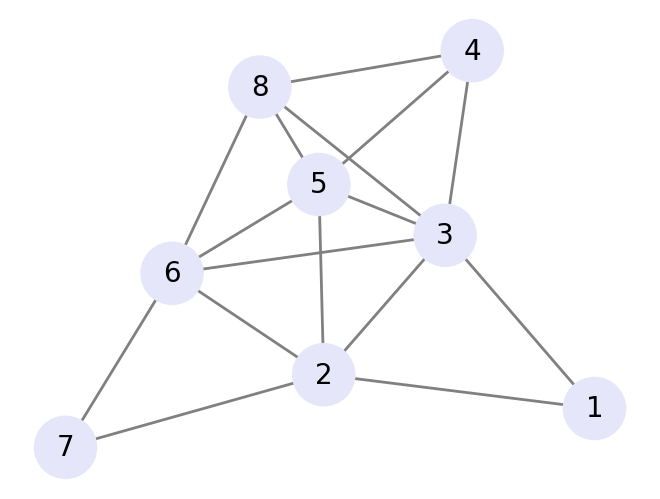

In [7]:
antenna_1 = (0, 0)
antenna_2 = (3, 5.2)
antenna_3 = (6, 0)
antenna_4 = (9, -5.2)
antenna_5 = (9, 0)
antenna_6 = (9, 5.2)
antenna_7 = (9, 10.4)
antenna_8 = (12, 0)

# Create list out of antenna's coordinates
antennas = [antenna_1, antenna_2, antenna_3, antenna_4, antenna_5, antenna_6, antenna_7, antenna_8]
max_interference_distance = 8.7

# Create adjacency list
adjacent_list, vertices = model_antenna_frequency(antennas, max_interference_distance)

# Plot Graph
graph_model = Graph(len(antennas))
graph_model.add_adjacency_list(adjacent_list)
graph_model.visualize() 

**Step 2: Graph Coloring with classical methods**

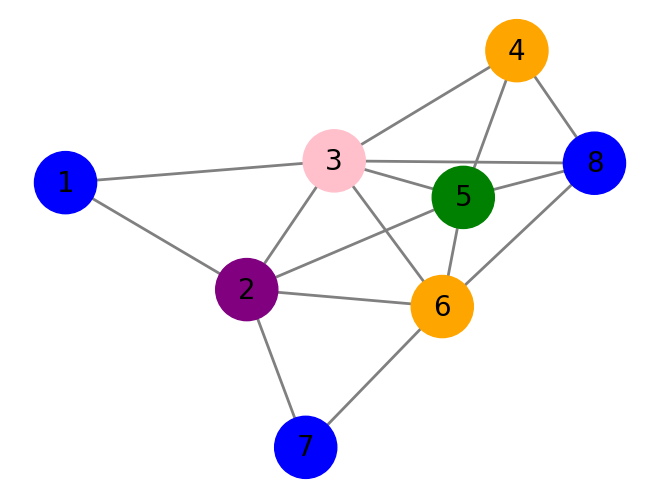

In [8]:
# Create graph
graph_classic = Graph(vertices)

# Create adjacency list (using step1 data)
graph_classic.add_adjacency_list(adjacent_list)

# Color graph by repetitively calling MIS (see step2.py)
graph_classic.color_graph(graph_coloring(adjacent_list, vertices))

# Plot Graph 
graph_classic.visualize()

**Step 3: MIS Solver in Pulser**

In [9]:
# Example with antennas located on a straight line at 5km intervals
antenna_1 = (0, 0)
antenna_2 = (0, 5)
antenna_3 = (0, 10)
antenna_4 = (0, 15)
antenna_5 = (0, 20)

# Create list out of antenna's coordinates
antennas_2 = [antenna_1, antenna_2, antenna_3, antenna_4, antenna_5]
maximum_interference_distance = 5

active_qubits = list(range(len(antennas_2)))

# MIS (see step3.py)
mis_1 = pulser_MIS(antennas_2, maximum_interference_distance)

# Remove the colored antennas
active_qubits = [i for i, bit in enumerate(mis_1) if bit == '0' and i in active_qubits]

# MIS
mis_2 = pulser_MIS(antennas_2, maximum_interference_distance, active_qubits)

# Remove the colored antennas
active_qubits = [i for i, bit in enumerate(mis_2) if bit == '0' and i in active_qubits]

Counter({'10101': 467, '10001': 185, '00101': 95, '10100': 84, '01010': 51, '01001': 42, '10010': 33, '00001': 18, '10000': 18, '00100': 5, '00000': 2})
Maximum Independent Set: [1, 3, 5]
Counter({'11': 780, '01': 118, '10': 98, '00': 4})
Maximum Independent Set: [2, 4]


**Step 4: Graph Coloring in Pulser**

Counter({'10010010': 679, '10000011': 320, '10000010': 1})
Maximum Independent Set: [1, 4, 7]
Counter({'10001': 998, '00001': 2})
Maximum Independent Set: [2, 8]
Counter({'001': 369, '100': 321, '010': 309, '000': 1})
Maximum Independent Set: [6]
Counter({'10': 503, '01': 497})
Maximum Independent Set: [3]
Counter({'1': 1000})
Maximum Independent Set: [5]


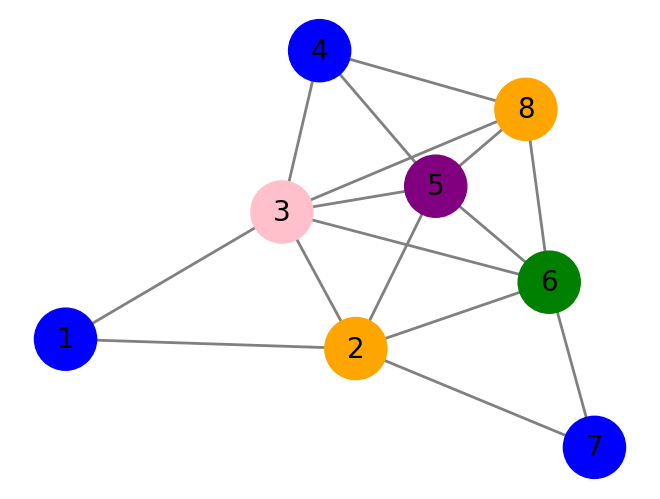

In [10]:
# Using the coordinates of the antenna from step 1

adjacent_list = model_antenna_frequency(antennas, max_interference_distance)[0]

# Graph initialization
graph_pulser = Graph(len(antennas))

# Create adjacency list
graph_pulser.add_adjacency_list(adjacent_list)

# Color graph by repetitively calling MIS (see step4.py)
graph_pulser.color_graph(pulser_color_graph(antennas, max_interference_distance))

# Plot Graph
graph_pulser.visualize()



Comparison of output with classical algorithm

In [11]:
# Get unique colors
unique_colors_classic = set(graph_classic.colors.values())
num_colors_classic = len(unique_colors_classic)

unique_colors_pulser = set(graph_pulser.colors.values())
num_colors_pulser = len(unique_colors_pulser)

print(f"The classical graph coloring implementation uses {num_colors_classic} colors")
print(f"The pulser graph coloring implementation uses {num_colors_pulser} colors")

The classical graph coloring implementation uses 5 colors
The pulser graph coloring implementation uses 5 colors


**Step 5: More realistic graph coloring**

MIS only

In [16]:
# Example with antennas located on a straight line at 5km intervals (same entry as step3)
active_qubits = list(range(len(antennas_2)))

# MIS (see step5.py)
mis_1 = realistic_pulser_MIS(antennas_2, maximum_interference_distance)

# Remove the colored antennas
active_qubits = [i for i, bit in enumerate(mis_1) if bit == '0' and i in active_qubits]

# MIS
mis_2 = realistic_pulser_MIS(antennas_2, maximum_interference_distance, active_qubits)

# Remove the colored antennas
active_qubits = [i for i, bit in enumerate(mis_2) if bit == '0' and i in active_qubits]

Counter({'10101': 236, '10001': 199, '10000': 129, '10100': 93, '00101': 81, '01001': 77, '00001': 60, '00100': 45, '10010': 44, '01000': 36})
Maximum Independent Set: [1, 3, 5]
Counter({'11': 598, '10': 225, '01': 137, '00': 40})
Maximum Independent Set: [2, 4]


Graph Coloring

In [13]:
# Same coordinates as in the previous step, except that the last coordinate has been removed
# Unable to emulate our noise configuration for more than 7 qubits
antenna_1 = (0, 0)
antenna_2 = (3, 5.2)
antenna_3 = (6, 0)
antenna_4 = (9, -5.2)
antenna_5 = (9, 0)
antenna_6 = (9, 5.2)
antenna_7 = (9, 10.4)


# Create list out of antenna's coordinates
antennas = [antenna_1, antenna_2, antenna_3, antenna_4, antenna_5, antenna_6, antenna_7]
max_interference_distance = 8.7

# Create adjacency list
adjacent_list, vertices = model_antenna_frequency(antennas, max_interference_distance)

Counter({'1001001': 521, '1000101': 125, '1000010': 91, '1000001': 61, '1001000': 34, '1001101': 25, '1001011': 24, '1001010': 22, '0010001': 20, '0001000': 19, '1011001': 18, '0000001': 15, '0001001': 13, '1000100': 12})
Maximum Independent Set: [1, 4, 7]
Counter({'0010': 409, '1000': 155, '1010': 117, '0100': 95, '0000': 82, '0101': 43, '0001': 42, '1100': 23, '1110': 18, '1001': 16})
Maximum Independent Set: [5]
Counter({'010': 563, '100': 221, '001': 182, '000': 20, '011': 14})
Maximum Independent Set: [3]
Counter({'01': 674, '10': 326})
Maximum Independent Set: [6]
Counter({'1': 883, '0': 117})
Maximum Independent Set: [2]


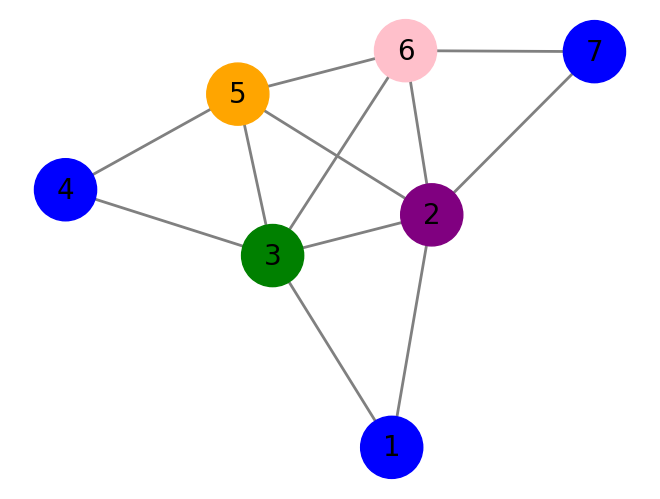

In [14]:
# Graph initialization
graph_pulser = Graph(len(antennas))

# Create adjacency list
graph_pulser.add_adjacency_list(adjacent_list)

# Color graph by repetitively calling MIS (see step5.py)
graph_pulser.color_graph(realistic_pulser_color_graph(antennas, max_interference_distance))

# Plot Graph
graph_pulser.visualize()